Импорт библиотек

In [2]:
# data analysis 
import pandas as pd
import numpy as np
from datetime import datetime
today = datetime.today()
# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# pd.set_option('display.max_rows', None)

Импорт датасетов

In [3]:
attend = pd.read_csv('I:\\Download\\Датасеты\\attend.csv')
groups = pd.read_csv('I:\\Download\\Датасеты\\groups.csv')
users = pd.read_csv('I:\\Download\\Датасеты\\users.csv')
dictx = pd.read_excel('I:\\Download\\Датасеты\\dict.xlsx')
test = pd.read_csv('I:\\Download\\Датасеты\\test.csv')

Переименование полей (для удобства обработки)

In [4]:
attend = attend.rename(columns={"уникальный номер занятия": "numzan", "уникальный номер группы": "numgroup", "уникальный номер участника": "numclient",
                               "направление 2": "type2", "направление 3": "type3", "онлайн/офлайн": "online", "дата занятия": "datezan",
                               "время начала занятия": "timebegin", "время окончания занятия": "timeend"})
groups = groups.rename(columns={"уникальный номер": "numgroup", "направление 1": "type1", "направление 2": "type2", "направление 3": "type3", 
                       "адрес площадки": "address", "округ площадки": "okrug", "район площадки": "region", "расписание в активных периодах": "active_schedule",
                      "расписание в закрытых периодах": "end_schedule", "расписание в плановом периоде": "plan_schedule"})
users = users.rename(columns={"уникальный номер": "numclient", "дата создание личного дела": "datereg", "пол": "sex", "дата рождения": "datebirth", 
                       "адрес проживания": "address_live"})

EDA

In [5]:
attend.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901274 entries, 0 to 5901273
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   numzan     int64 
 1   numgroup   int64 
 2   numclient  int64 
 3   type2      object
 4   type3      object
 5   online     object
 6   datezan    object
 7   timebegin  object
 8   timeend    object
dtypes: int64(3), object(6)
memory usage: 3.1 GB


In [6]:
#Смотрим пропущенные значения - пропущенных нет
attend.isnull().sum()

numzan       0
numgroup     0
numclient    0
type2        0
type3        0
online       0
datezan      0
timebegin    0
timeend      0
dtype: int64

In [7]:
# Смотрим общую статистику
attend.describe(include='object')

,type2,type3,online,datezan,timebegin,timeend
count,5901274,5901274,5901274,5901274,5901274,5901274
unique,81,453,2,333,157,156
top,ОНЛАЙН Гимнастика,ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...,Да,2023-02-14,10:00:00,11:00:00
freq,819496,413095,3816929,39308,658684,599741


In [8]:
attend.numgroup.nunique() #Количество уникальных групп

24535

In [9]:
attend.numzan.nunique() #Количество уникальных занятий

647132

In [10]:
attend.numclient.nunique() #Уникальное количество пользователей всего

50906

In [11]:
# ТОП пользователей по группам 
attend\
    .groupby(['numclient', 'type2']) \
    .agg({'numgroup':'count'}) \
    .sort_values(by=['numgroup'], ascending=False).head() 

,,numgroup
numclient,type2,
101387204,ОНЛАЙН Художественно-прикладное творчество,743
101426166,ОНЛАЙН Рисование,628
101391680,ОНЛАЙН Рисование,621
101354085,ОНЛАЙН Художественно-прикладное творчество,569
101358683,ОНЛАЙН Рисование,567


In [12]:
# Количество пользователей посетивших различные занятия
attend.groupby(['type2', 'type3', 'online']).agg({"numclient": 'count'})\
    .sort_values(by=['numclient'], ascending=False).reset_index().head()

,type2,type3,online,numclient
0,ОНЛАЙН Красота и стиль,ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...,Да,413095
1,ОНЛАЙН Гимнастика,ОНЛАЙН Гимнастика,Да,209704
2,Скандинавская ходьба,Скандинавская ходьба,Нет,182593
3,ОНЛАЙН Гимнастика,ОНЛАЙН Суставная гимнастика,Да,173138
4,ОНЛАЙН Психология и коммуникации,ОНЛАЙН Психологические тренинги,Да,145011


In [13]:
# ID пользователя с минимальной активностью за год
attend.groupby(['numclient'])['datezan'].nunique().idxmin()

101415587

In [14]:
# ID пользователя с максимальной активностью за год
attend.groupby(['numclient'])['datezan'].nunique().idxmax()

101420479

In [15]:
#Пользователь с максимальной активностью за год
attend.query('numclient == 101420479').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False)

,type3
type2,
ОНЛАЙН Красота и стиль,229
ОНЛАЙН Гимнастика,146
ОНЛАЙН Здорово жить,127
ОНЛАЙН Психология и коммуникации,81
ОНЛАЙН ОФП,80


In [16]:
#Пользователь с минимальной активностью за год
attend.query('numclient == 101415587').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False)

,type3
type2,
Информационные технологии,5


In [17]:
attend.groupby('online').agg({'numzan':'nunique'})\
    .sort_values(by=['numzan'], ascending=False).head()

,numzan
online,
Нет,412908
Да,234224


In [18]:
print(f'''Занятий онлайн: {100*(234224/647132):.2f}%
Занятий офлайн: {100*(412908/647132):.2f}%''')

Занятий онлайн: 36.19%
Занятий офлайн: 63.81%


In [19]:
attend.groupby('online').agg({'numgroup':'nunique'})\
    .sort_values(by=['numgroup'], ascending=False).head()

,numgroup
online,
Нет,17185
Да,7350


In [20]:
print(f'''Групп онлайн: {100*(7350/24535):.2f}%
Групп офлайн: {100*(17185/24535):.2f}%''')

Групп онлайн: 29.96%
Групп офлайн: 70.04%


In [21]:
# Онлайн программы по популярности
attend.query('online == "Да"').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False).head()

,type3
type2,
ОНЛАЙН Гимнастика,819496
ОНЛАЙН Красота и стиль,461259
ОНЛАЙН Здорово жить,346469
"ОНЛАЙН История, искусство, краеведение",294575
ОНЛАЙН Рисование,228054


In [22]:
# Офлайн программы по популярности
attend.query('online == "Нет"').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False).head()

,type3
type2,
Гимнастика,408361
Танцы,223793
"Фитнес, тренажеры",210518
Скандинавская ходьба,182593
Спортивные игры,153462


In [23]:
attend['datezan'] = attend['datezan'].astype("datetime64[ns]") #Дату преобразовал в формат даты
#Смотрим за какой отрезок времени наш датасет - 333 дня - 1 год
attend['datezan'].max() - attend['datezan'].min()

Timedelta('333 days 00:00:00')

In [24]:
groups.head()

,numgroup,type1,type2,type3,address,okrug,region,active_schedule,end_schedule,plan_schedule
0,801357270,Физическая активность,ОФП,ОФП,"город Москва, Саратовская улица, дом 16, корпус 2",Юго-Восточный административный округ,муниципальный округ Текстильщики,NaN,"c 01.01.2023 по 31.03.2023, Пн., Ср. 19:10-20:...",NaN
1,801356857,Физическая активность,ОФП,ОФП,"город Москва, Подольская улица, дом 5",Юго-Восточный административный округ,муниципальный округ Марьино,NaN,"c 09.01.2023 по 31.03.2023, Вт., Чт. 10:00-11:...",NaN
2,801351684,Физическая активность,ОФП,ОФП,"г. Москва, Базовская улица, дом 15, строение 1...","Северный административный округ, Северный адми...","муниципальный округ Западное Дегунино, муницип...",NaN,"c 09.01.2023 по 31.03.2023, Вт., Чт. 19:00-20:...",NaN
3,801353683,Физическая активность,ОФП,ОФП,"город Москва, улица Обручева, дом 28А, город М...","Юго-Западный административный округ, Юго-Запад...","муниципальный округ Обручевский, муниципальный...",NaN,"c 09.01.2023 по 31.03.2023, Пн., Ср. 13:30-14:...",NaN
4,801352164,Физическая активность,ОФП,ОФП,"город Москва, Воронцовский парк, дом 3, город ...","Юго-Западный административный округ, Юго-Запад...","муниципальный округ Обручевский, муниципальный...",NaN,"c 10.01.2023 по 28.02.2023, Вт., Пт. 12:00-13:...",NaN


In [25]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27003 entries, 0 to 27002
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   numgroup         27003 non-null  int64 
 1   type1            27003 non-null  object
 2   type2            27003 non-null  object
 3   type3            27003 non-null  object
 4   address          27003 non-null  object
 5   okrug            23021 non-null  object
 6   region           23021 non-null  object
 7   active_schedule  6522 non-null   object
 8   end_schedule     21643 non-null  object
 9   plan_schedule    67 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.1+ MB


In [26]:
#Смотрим пропущенные значения
groups.isnull().sum()

numgroup               0
type1                  0
type2                  0
type3                  0
address                0
okrug               3982
region              3982
active_schedule    20481
end_schedule        5360
plan_schedule      26936
dtype: int64

In [27]:
# Смотрим общую статистику
groups.describe(include='object')

,type1,type2,type3,address,okrug,region,active_schedule,end_schedule,plan_schedule
count,27003,27003,27003,27003,23021,23021,6522,21643,67
unique,12,81,456,4821,139,685,4458,19959,62
top,Образование,Гимнастика,Осваиваем мобильные устройства,"г. Москва, поселение Сосенское, деревня Зименк...",Восточный административный округ,муниципальный округ Ясенево,"c 09.01.2023 по 31.12.2023, Пн., Ср. 09:00-10:...","c 11.01.2022 по 31.12.2022, Вт., Чт. 09:00-10:...","c 29.04.2023 по 30.04.2023, Вс. 11:00-12:00, б..."
freq,9502,3048,890,412,2915,449,35,18,3


In [28]:
# Сопоставил номера групп из groups c attend на предмет наличия в attend
groups['numgroup'].isin(attend['numgroup']).value_counts()

True     24535
False     2468
Name: numgroup, dtype: int64

In [29]:
# Сопоставил номера пользователей из users c attend на предмет наличия в attend
users['numclient'].isin(attend['numclient']).value_counts()

True     50906
False     1428
Name: numclient, dtype: int64

Объединяем датасеты

In [30]:
attend = attend.loc[:,['numzan', 'numgroup', 'numclient', 'type2', 'type3', 'online', 'datezan']]
groups = groups.loc[:,['numgroup', 'type1', 'address', 'okrug', 'region']]
 ## чтобы не было пустых, сохраним в датафрейм, только те группы, которые есть в attend
plan = groups.loc[groups['numgroup'].isin(attend['numgroup'])]
 ## присоеденим группы к таблице attend                           
df = attend.merge(plan, how='outer', on='numgroup')
df = df.loc[:,['numzan', 'numgroup', 'numclient', 'type1', 'type2', 'type3', 'online', 'address', 'okrug', 'region', 'datezan']]
 ## чтобы не было пустых, сохраним в датафрейм, только тех пользователей, которые есть в attend
use = users.loc[users['numclient'].isin(df['numclient'])]
 ## присоеденим группы к таблице attend, которую ранее объединили с группами 
plan = df.merge(use, how='outer', on='numclient')
 ## поменяем тип данных у оставшихся полей с датами
plan['datebirth'] = plan['datebirth'].astype('datetime64[ns]')
plan['datereg'] = plan['datereg'].astype('datetime64[ns]')
 ## добавим поле расчета возраста пользователя по состоянию на сегодня
plan['age'] = plan['datebirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
 ## отберем поля для финального датасета
plan = plan.loc[:,['numzan', 'numgroup', 'numclient', 'type1', 'type2', 'type3', 'online', 'sex', 'datebirth', 'age', 'datereg', 'datezan']] #'datereg', 'datezan', 'okrug', 'region'
plan.head()

,numzan,numgroup,numclient,type1,type2,type3,online,sex,datebirth,age,datereg,datezan
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-01
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-03
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-08
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-10
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-22


In [31]:
plan.describe(include='object')

,type1,type2,type3,online,sex
count,5901274,5901274,5901274,5901274,5901274
unique,12,81,453,2,2
top,Образование,ОНЛАЙН Гимнастика,ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...,Да,Женщина
freq,2080278,819496,413095,3816929,5557997


In [32]:
# Количество мужчин и женщин
plan.groupby('sex').agg({'numclient':'nunique'})\
    .sort_values(by=['numclient'], ascending=False).head()

,numclient
sex,
Женщина,45971
Мужчина,4935


In [33]:
print(f'''Мужчин: {100*(4935/50906):.2f}%
Женщин: {100*(45971/50906):.2f}%''')

Мужчин: 9.69%
Женщин: 90.31%


In [34]:
plan.groupby(['online', 'sex']).agg({'numclient':'nunique'})\
    .sort_values(by=['numclient'], ascending=False).head()

,,numclient
online,sex,
Нет,Женщина,35226
Да,Женщина,26924
Нет,Мужчина,4183
Да,Мужчина,1539


In [35]:
# Возрасты по полу
plan.groupby(['sex']).agg(
    min_age=('age','min'),
    max_age=('age','max'),
    avg_age=('age', 'mean'),
)

,min_age,max_age,avg_age
sex,,,
Женщина,42,96,67.507075
Мужчина,42,96,70.052651


In [36]:
# Посчитаем количество женщин моложе 55 лет
age_fem_young = plan.loc[((plan['age'] <= 55) & (plan['sex'] == 'Женщина'))]
print(f'Количество женщин моложе 55 лет: {age_fem_young.numclient.nunique()} человек')

Количество женщин моложе 55 лет: 496 человек


In [37]:
# Количество мужчин моложе 60 лет
age_mal_young = plan.loc[((plan['age'] <= 60) & (plan['sex'] == 'Мужчина'))]
print(f'Количество мужчин моложе 60 лет: {age_mal_young.numclient.nunique()} человек')

Количество мужчин моложе 60 лет: 214 человек


In [38]:
# Количество регистраций на мероприятия по месяцам
plan.groupby([pd.Grouper(freq="1M", key="datezan"), "sex"])[["numclient"]].nunique()

numclient
datezan    sex               
2022-04-30 Женщина      28923
           Мужчина       2344
2022-05-31 Женщина      28517
           Мужчина       2367
2022-06-30 Женщина      27353
           Мужчина       2232
2022-07-31 Женщина      25365
           Мужчина       1964
2022-08-31 Женщина      26186
           Мужчина       1976
2022-09-30 Женщина      32556
           Мужчина       2799
2022-10-31 Женщина      36560
           Мужчина       3352
2022-11-30 Женщина      39349
           Мужчина       3799
2022-12-31 Женщина      39675
           Мужчина       3919
2023-01-31 Женщина      40759
           Мужчина       4129
2023-02-28 Женщина      41894
           Мужчина       4301

<Axes: xlabel='datezan'>

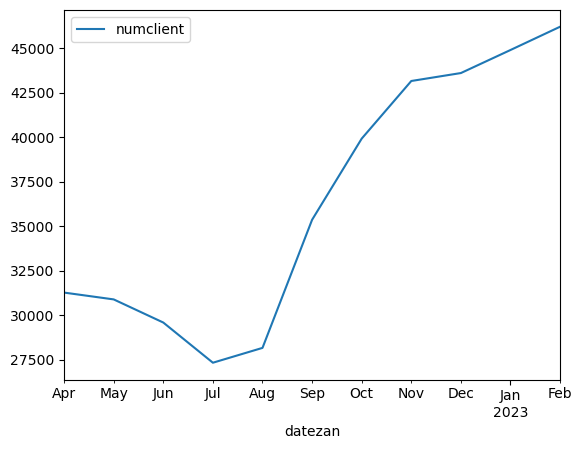

In [39]:
# Количество регистраций на мероприятия по месяцам - активность растет
plan.groupby([pd.Grouper(freq="1M", key="datezan")])[["numclient"]].nunique().plot(legend=True)

<Axes: xlabel='datebirth'>

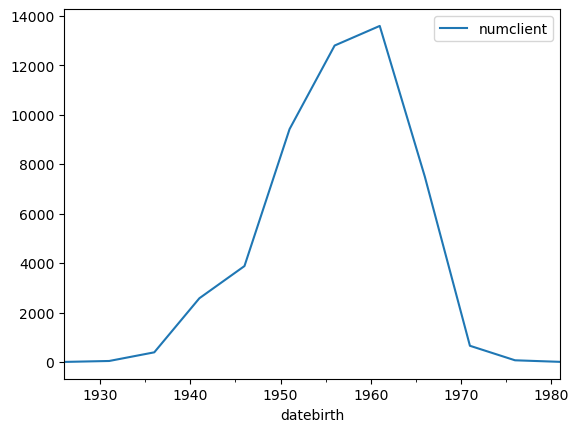

In [40]:
# Участники программы по годам рождения
plan.groupby([pd.Grouper(freq="5Y", key="datebirth")])[["numclient"]].nunique().plot(legend=True)

<Axes: xlabel='datezan'>

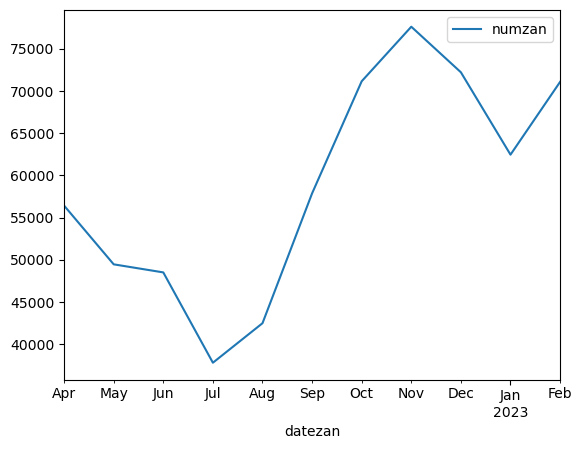

In [41]:
# Количество занятий - активностей - как меняется в течение года
plan.groupby([pd.Grouper(freq="1M", key="datezan")])[["numzan"]].nunique().plot(legend=True)

In [42]:
plan.head()

,numzan,numgroup,numclient,type1,type2,type3,online,sex,datebirth,age,datereg,datezan
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-01
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-03
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-08
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-10
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64,2018-03-20 14:54:07,2022-08-22


In [43]:
types = plan['type3']
types.describe()

count                                               5901274
unique                                                  453
top       ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...
freq                                                 413095
Name: type3, dtype: object

In [44]:
"""Количество пользователей по направлению Физическая активность, с разбивкой по полу, среднему возрасту участника,
типу занятия"""
plan.query("type1 == 'Физическая активность'").groupby(['type2', 'online', 'sex'])\
    .agg({"numclient": 'nunique', "age" : 'mean'}).reset_index() #.to_frame()

,type2,online,sex,numclient,age
0,Борьба,Нет,Женщина,38,62.838780
1,Борьба,Нет,Мужчина,22,64.071429
2,ГТО,Нет,Женщина,265,68.183867
3,ГТО,Нет,Мужчина,50,66.291076
4,Гимнастика,Нет,Женщина,13930,67.721676
5,Гимнастика,Нет,Мужчина,806,70.655632
6,Коньки,Нет,Женщина,111,64.245098
7,Коньки,Нет,Мужчина,9,70.967213
8,Лыжи,Нет,Женщина,65,68.572948
9,Лыжи,Нет,Мужчина,9,72.536232


,type1,age
0,Игры,69.367789
1,Образование,67.759223
2,Пение,70.067063
3,Рисование,66.910890
4,Спецпроект / Интеллектуальный клуб,67.200858
5,Спецпроект / Московский театрал,67.229051
6,Спецпроект / Серебряный университет,61.198604
7,Спецпроект / Тренировки долголетия (спецпроект...,69.376055
8,Танцы,66.932076
9,Творчество,66.346509


<Axes: xlabel='type1'>

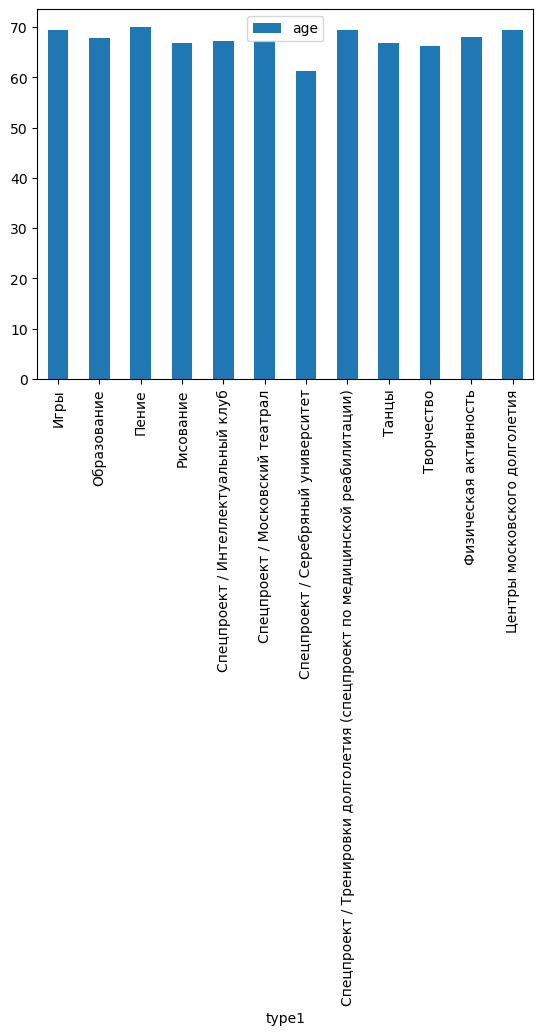

In [45]:
# Средний возраст участников по направлениям
md = pd.DataFrame(plan.groupby(['type1'])[['age']].mean())
md.reset_index(drop=False, inplace=True)
display(md)
md.plot(x='type1', y='age', kind='bar')